# Bonds exploratory analysis

Bonds are fixed income instruments arising from a loan between an investor and a borrower (usually corporate or governmental). In this notebook we explore the average *yield* of U.S treasury rate bonds with constant maturity over the years. 

In [1]:
%config InlineBackend.figure_format = 'retina'

import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

warnings.simplefilter('ignore')
register_matplotlib_converters()

In [2]:
sns.set(rc={'figure.figsize': (12,8)})

## Data munging

In [3]:
data_dir = 'data/'

In [ ]:
dfs = []
reference = {
    'DGS1MO.csv': 'one_month',
    'DGS3MO.csv': 'three_months',
    'DGS1.csv': 'one_year',
    'DGS2.csv': 'two_years',
    'DGS3.csv': 'three_years',
    'DGS5.csv': 'five_years',
    'DGS10.csv': 'ten_years',
    'DGS30.csv': 'thirty_years'
}

for file in os.listdir(data_dir):
    series = reference[file]
    df = pd.read_csv(os.path.join(data_dir, file),
                     names=['date', series],
                     skiprows=1,
                     index_col='date',
                     parse_dates=['date'],
                     na_values='.')
    dfs.append(df)

bonds = pd.concat(dfs, axis=1)
bonds = bonds.reindex(columns=[
    'one_month', 'three_months', 'one_year', 'two_years', 'three_years',
    'five_years', 'ten_years', 'thirty_years'
],
                      copy=False)
bonds.to_csv(os.path.join(data_dir, 'bonds.csv'))

## Exploration

In [4]:
bonds = pd.read_csv(os.path.join(data_dir, 'bonds.csv'), index_col='date', parse_dates=['date'])

In [5]:
bonds.tail()

,one_month,three_months,one_year,two_years,three_years,five_years,ten_years,thirty_years
date,,,,,,,,
2019-08-23,2.07,1.97,1.73,1.51,1.43,1.40,1.52,2.02
2019-08-26,2.09,2.01,1.75,1.54,1.47,1.43,1.54,2.04
2019-08-27,2.07,1.98,1.77,1.53,1.43,1.40,1.49,1.97
2019-08-28,2.07,1.99,1.74,1.50,1.42,1.37,1.47,1.94
2019-08-29,2.10,1.99,1.75,1.53,1.44,1.40,1.50,1.97


In [6]:
bonds.describe()

,one_month,three_months,one_year,two_years,three_years,five_years,ten_years,thirty_years
count,4523.000000,9418.000000,14401.000000,10809.000000,14401.000000,14401.000000,14401.000000,9637.000000
mean,1.289766,3.922607,5.117681,5.303314,5.538407,5.804956,6.142178,6.765167
std,1.498167,3.123336,3.397248,3.757526,3.259276,3.111197,2.888204,3.031926
min,0.000000,0.000000,0.080000,0.160000,0.280000,0.560000,1.370000,1.940000
25%,0.060000,0.960000,2.580000,1.870000,3.280000,3.640000,4.070000,4.270000
50%,0.880000,3.980000,5.140000,5.220000,5.540000,5.720000,5.900000,6.570000
75%,1.980000,5.840000,7.000000,7.680000,7.410000,7.640000,7.790000,8.620000
max,5.270000,15.490000,17.310000,16.950000,16.590000,16.270000,15.840000,15.210000


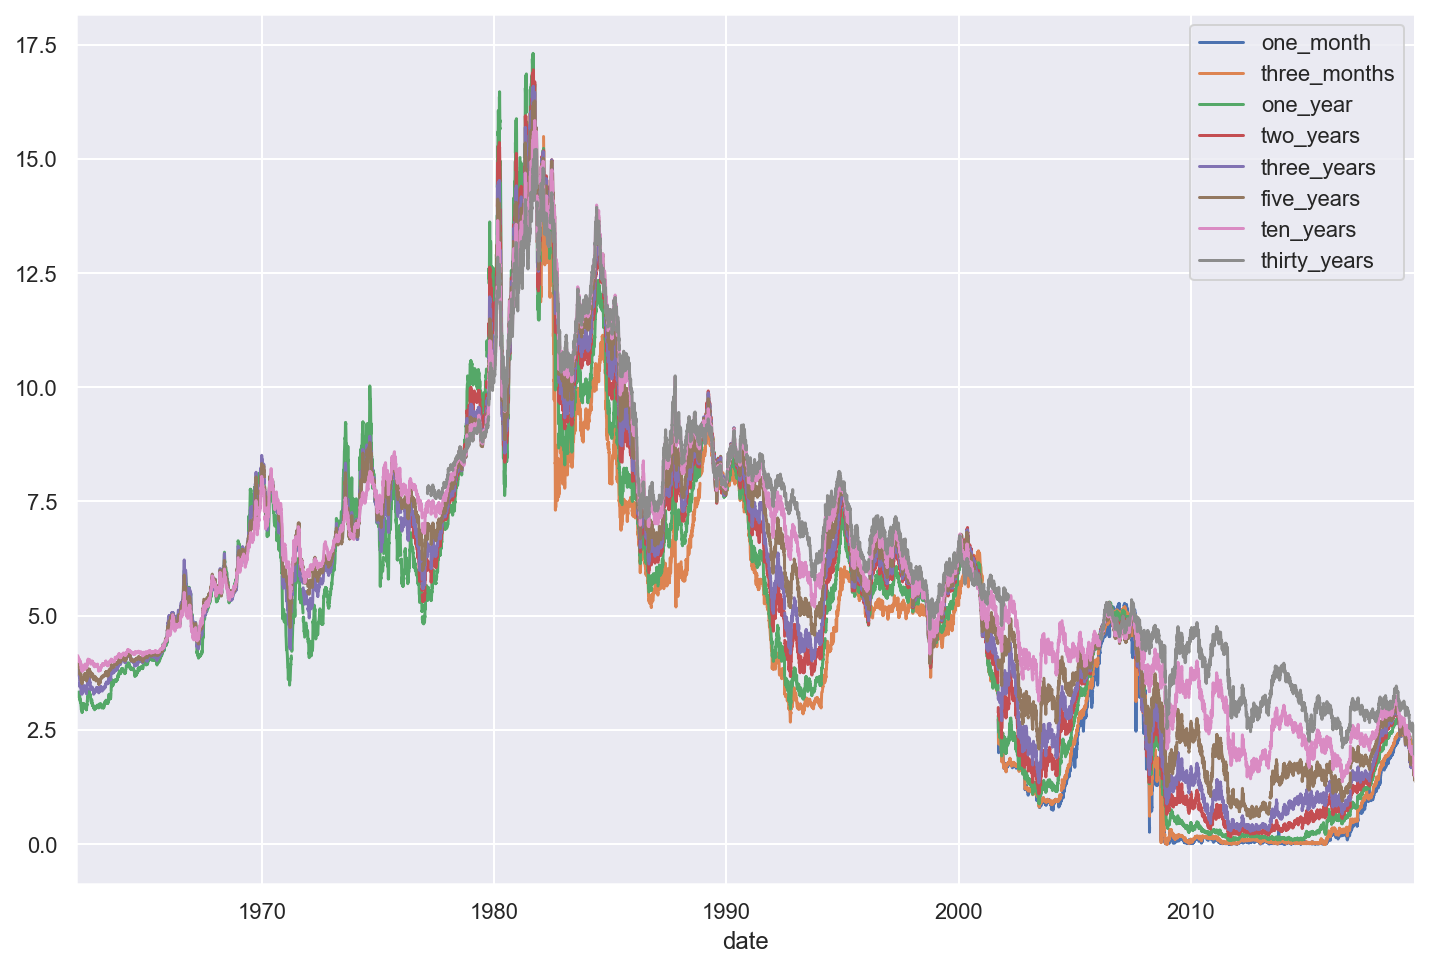

In [7]:
bonds.plot();

We can see that the yield values skyrocketed at the beginning of the eighties because of the [high inflation](https://www.usinflationcalculator.com/inflation/historical-inflation-rates/) experienced at the time, and then experienced a gradual decline across all maturity levels. By 2008, low maturity bonds reached almost zero yield due to the crisis. On the other hand, high maturity bonds were less affected because of their long term nature, though they still continued to drop throughout the next decade. The plot also shows how higher maturity bonds tend to have a higher associated yield as one would expect, although this might not be the case when zooming into smaller timeframes. Time periods where lower maturity bonds have a higher yield (i.e, where the yield curves are *inverted*) tend to be associated with economic recession.

To better visualize how higher maturity bonds typically have a higher yield, we plot the average yield by maturity from 2002 (when the data for one month maturity starts) to the present.

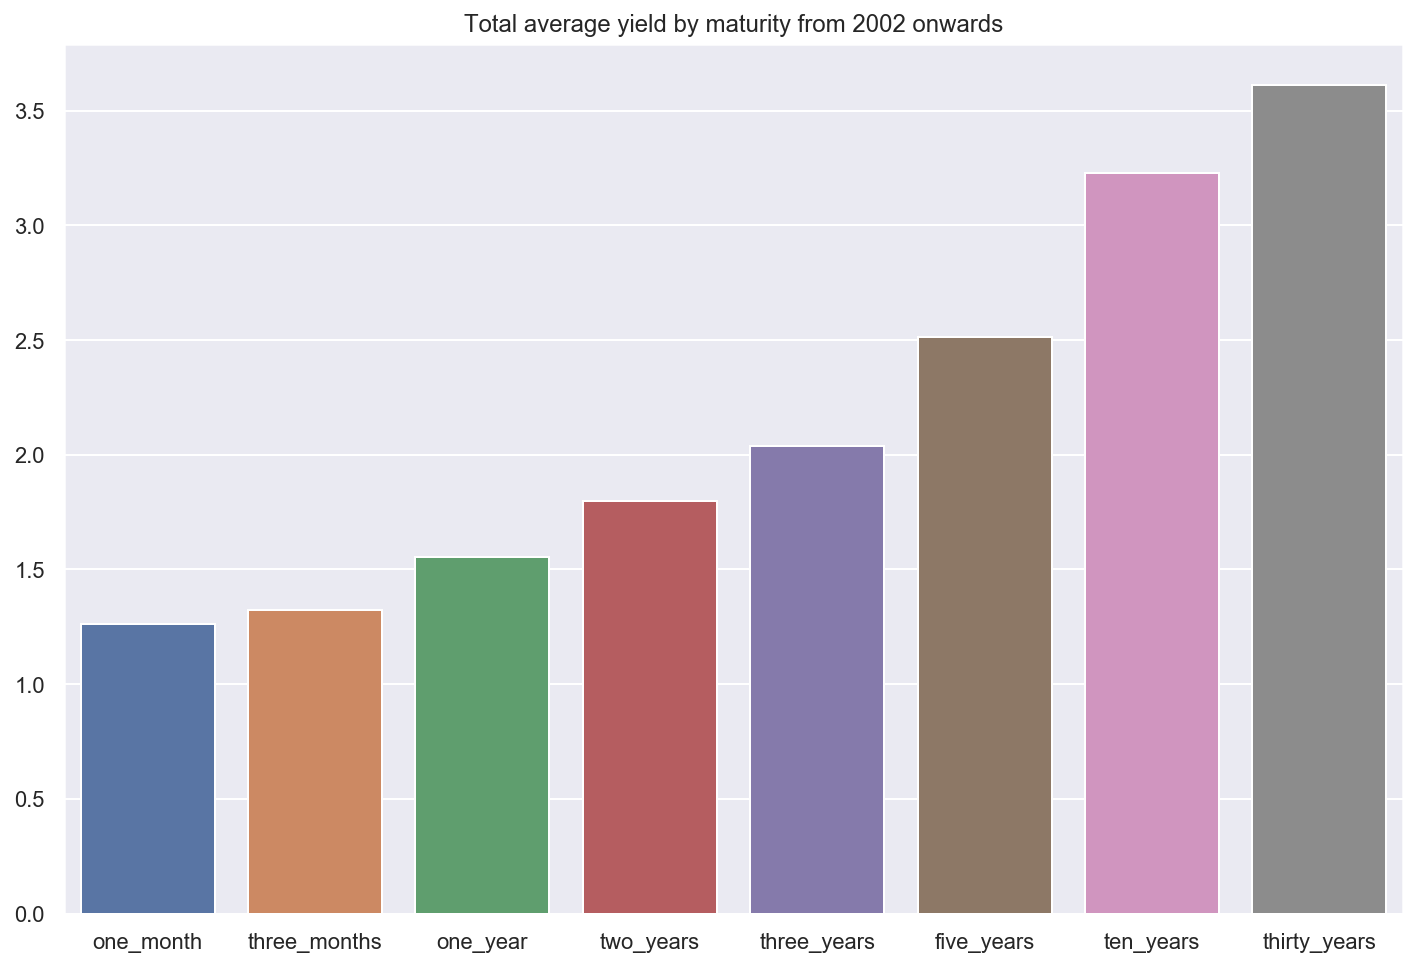

In [8]:
bonds_2002_onwards = bonds['2002':]
sns.barplot(x=bonds_2002_onwards.mean().index,y=bonds_2002_onwards.mean().values);
plt.title('Total average yield by maturity from 2002 onwards');

Now we plot the *yearly* average yield by maturity starting in 2002. The color palette remains consistent with the previous one.

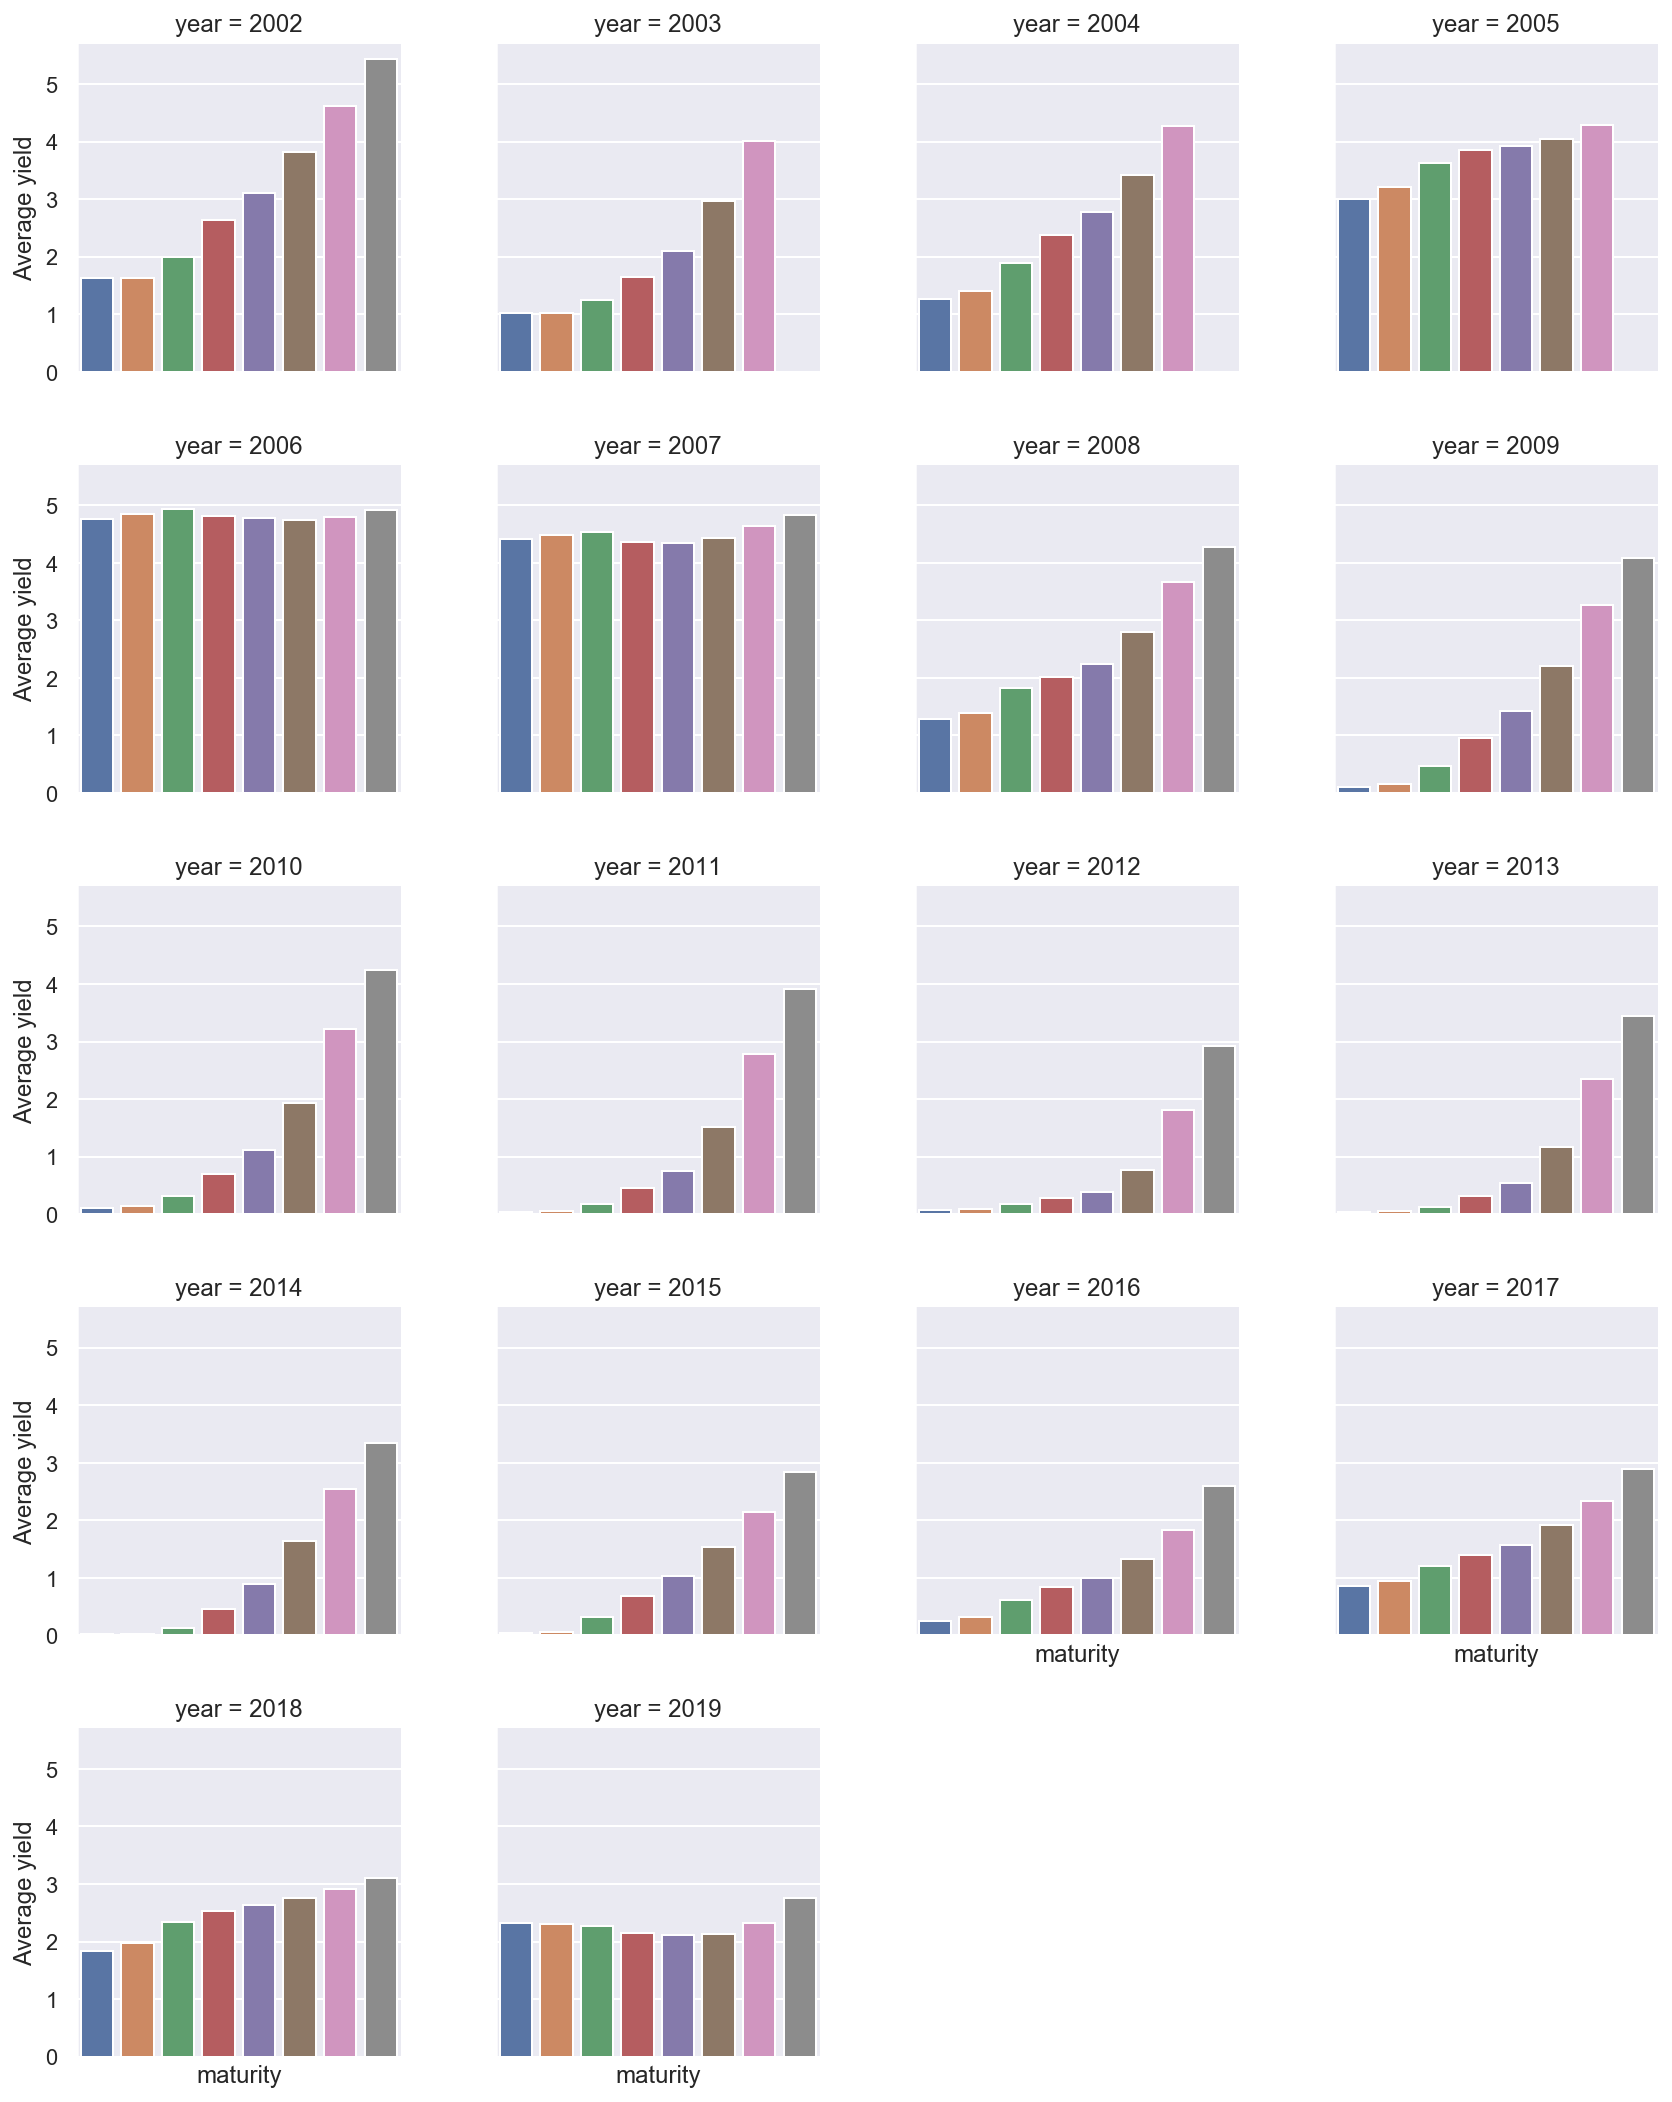

In [28]:
bonds_yearly_mean = bonds['2002':].resample('Y').mean()
bonds_yearly_mean = bonds_yearly_mean.reset_index()
bonds_yearly_mean['year'] = bonds_yearly_mean['date'].dt.year
bonds_yearly_mean.drop('date',axis=1, inplace=True)
bonds_yearly_mean_tidy = bonds_yearly_mean.melt(id_vars = 'year', var_name = 'maturity', value_name='Average yield')
g = sns.FacetGrid(bonds_yearly_mean_tidy, col='year', col_wrap=4)
g = g.map(sns.barplot,'maturity','Average yield',palette = 'deep');
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=False)

Notice how the barplots flatten in certain time periods, namely 2006, 2007 and 2019. We will explore this more in the next section.

We'll now transform the data into a tidy (long) format to visualize it with `seaborn`.

In [9]:
bonds_tidy = bonds.reset_index().melt(id_vars='date', var_name='maturity', value_name='yield')

In [10]:
bonds_tidy.tail()

,date,maturity,yield
120339,2019-08-23,thirty_years,2.02
120340,2019-08-26,thirty_years,2.04
120341,2019-08-27,thirty_years,1.97
120342,2019-08-28,thirty_years,1.94
120343,2019-08-29,thirty_years,1.97


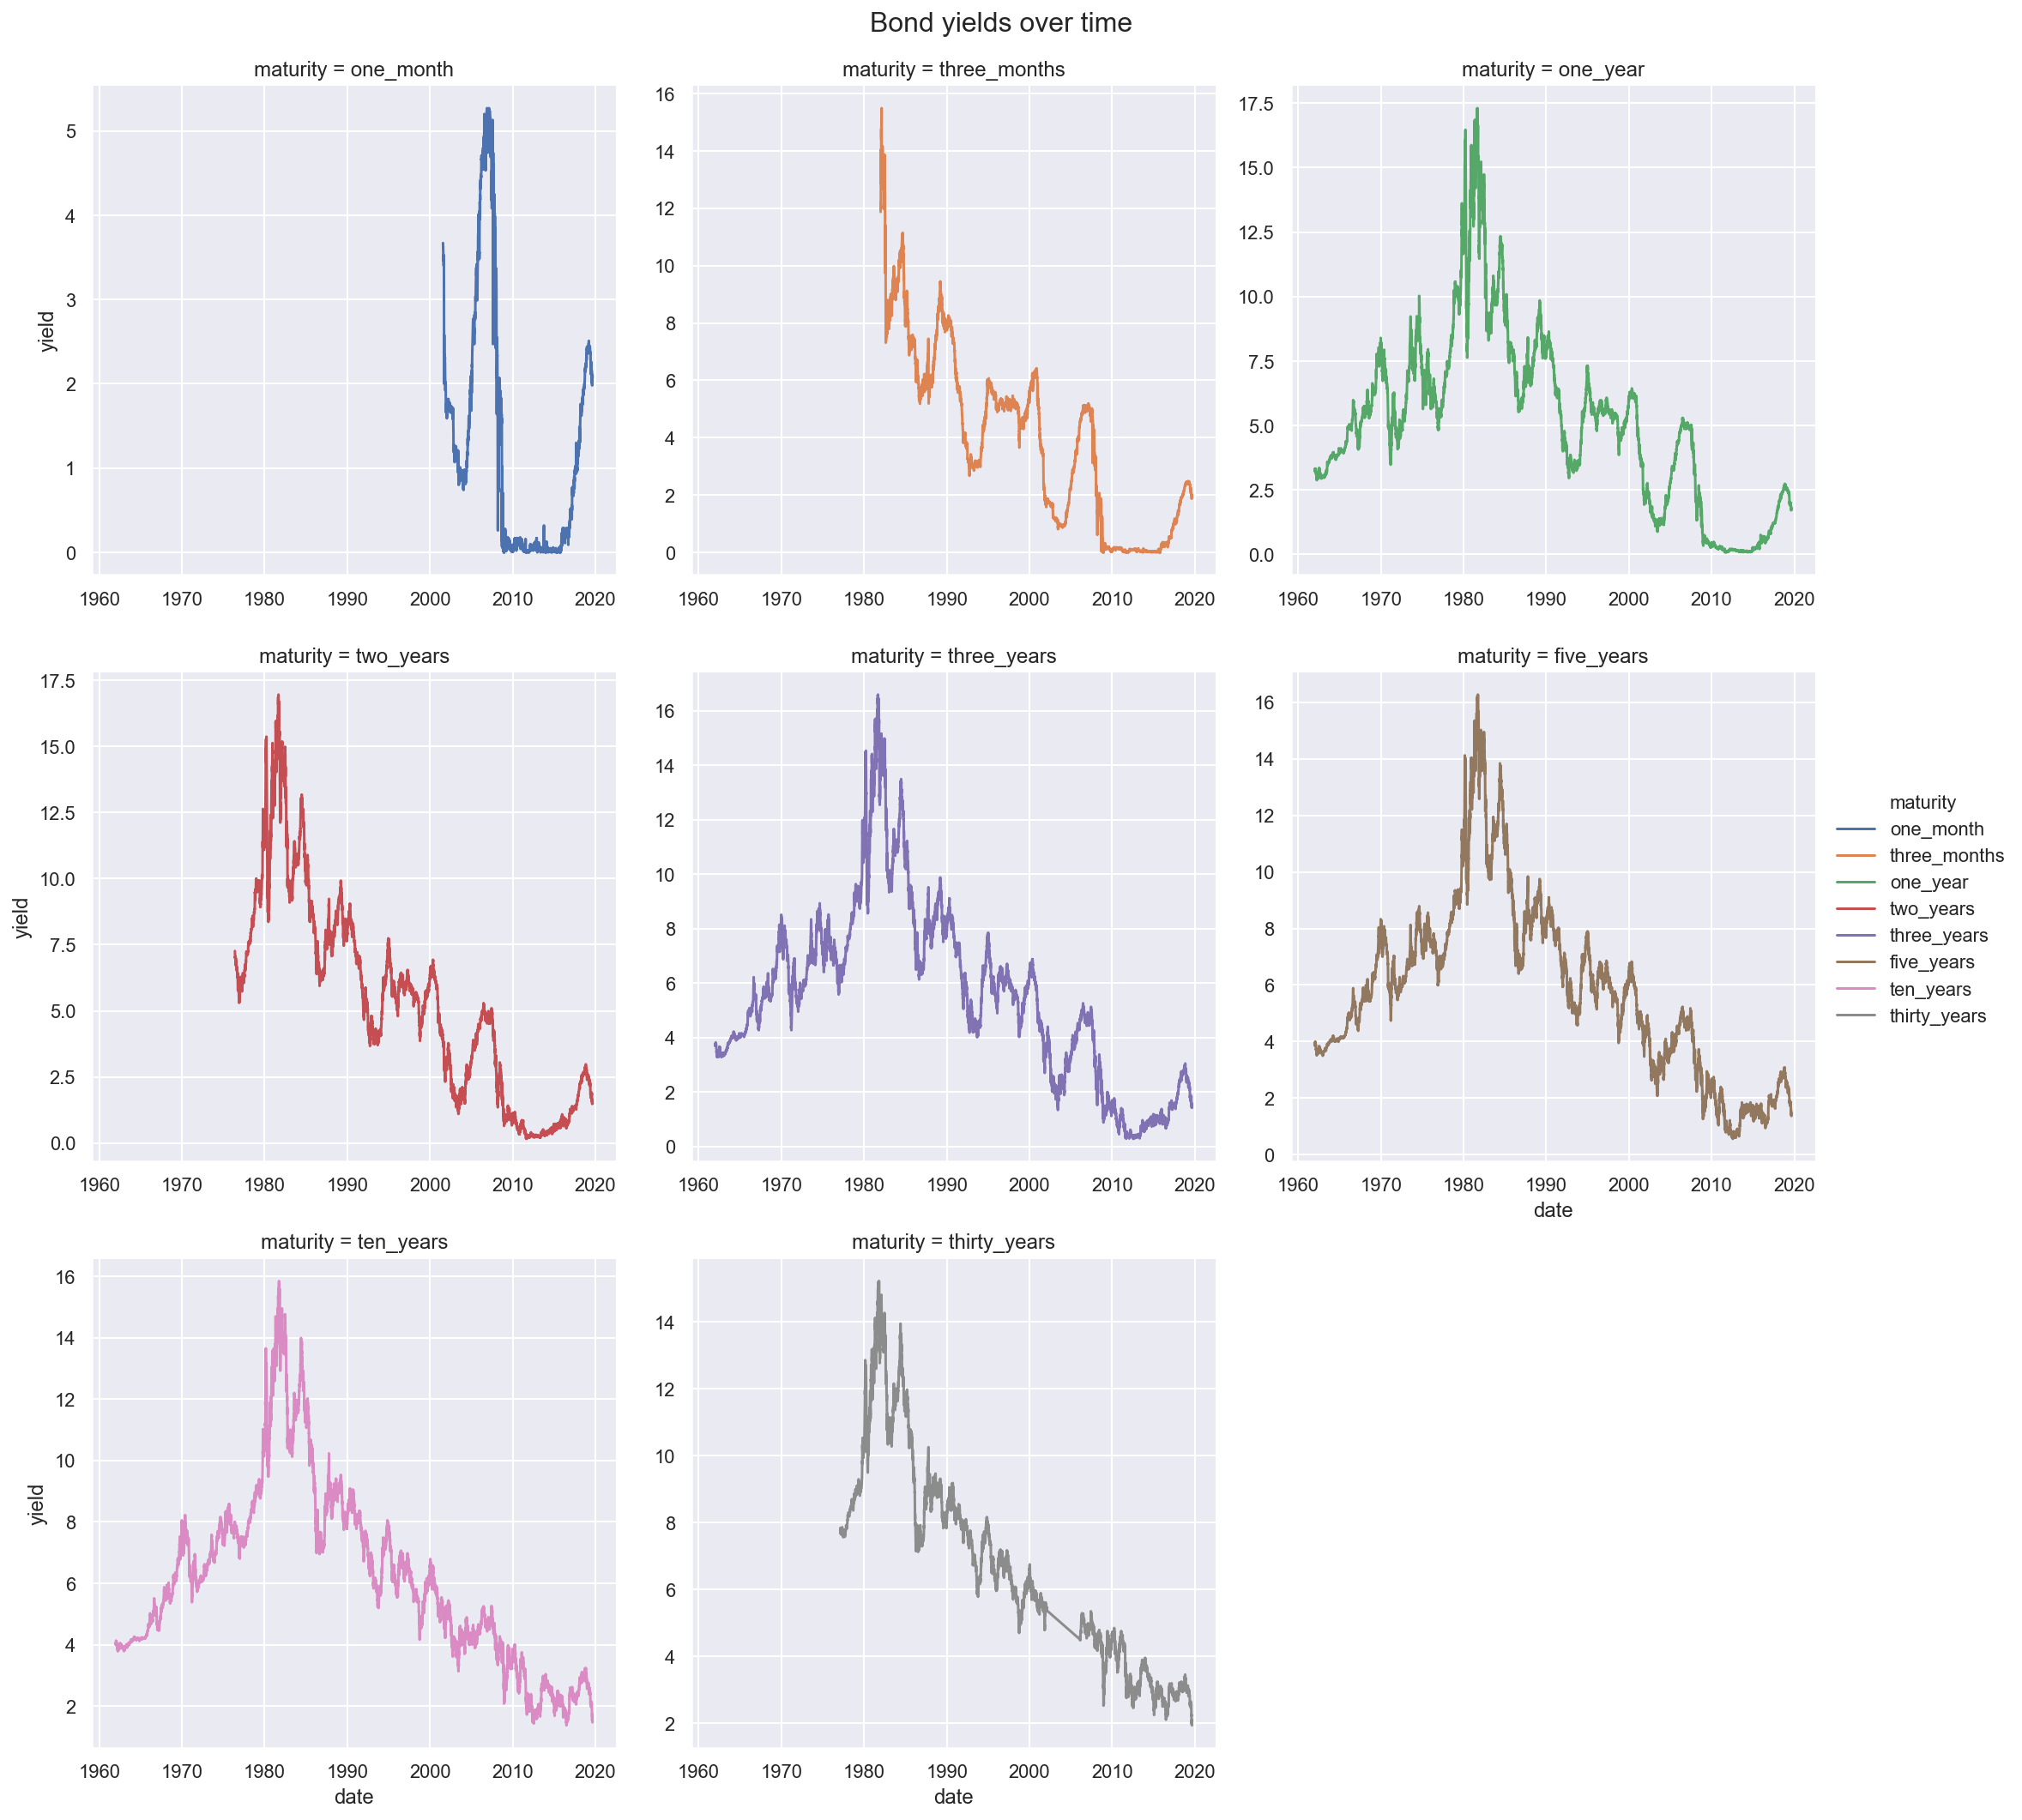

In [24]:
g = sns.relplot(x='date', y='yield', col='maturity', hue='maturity',
            facet_kws=dict(sharey=False, sharex=True), col_wrap=3,
            kind='line', data=bonds_tidy)

g.fig.suptitle('Bond yields over time', size=16)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
g.fig.subplots_adjust(top=.94, hspace=0.2);

### Yield curves

Let's plot the [yield curves](https://www.investopedia.com/terms/y/yieldcurve.asp) for each month in 2005. We'll have a look at the **three months**, **one year** and **ten year** maturities.

In [12]:
bonds_2005 = bonds.loc['2005']
bonds_2005['day'] = bonds_2005.index.day
bonds_2005['month'] = bonds_2005.index.month_name()
bonds_2005.head()

,one_month,three_months,one_year,two_years,three_years,five_years,ten_years,thirty_years,day,month
date,,,,,,,,,,
2005-01-03,1.99,2.32,2.79,3.10,3.28,3.64,4.23,NaN,3,January
2005-01-04,2.05,2.33,2.82,3.20,3.38,3.72,4.29,NaN,4,January
2005-01-05,2.04,2.33,2.83,3.22,3.39,3.73,4.29,NaN,5,January
2005-01-06,2.04,2.31,2.82,3.18,3.36,3.71,4.29,NaN,6,January
2005-01-07,2.03,2.32,2.82,3.20,3.40,3.73,4.29,NaN,7,January


In [13]:
bonds_2005_tidy = bonds_2005.melt(id_vars=['day', 'month'], var_name='maturity', value_name='yield')

# We'll plot only 10y, 1y, 3m bond series
bonds_2005_subset = bonds_2005_tidy.loc[bonds_2005_tidy['maturity'].isin(['three_months', 'one_year', 'ten_years'])]

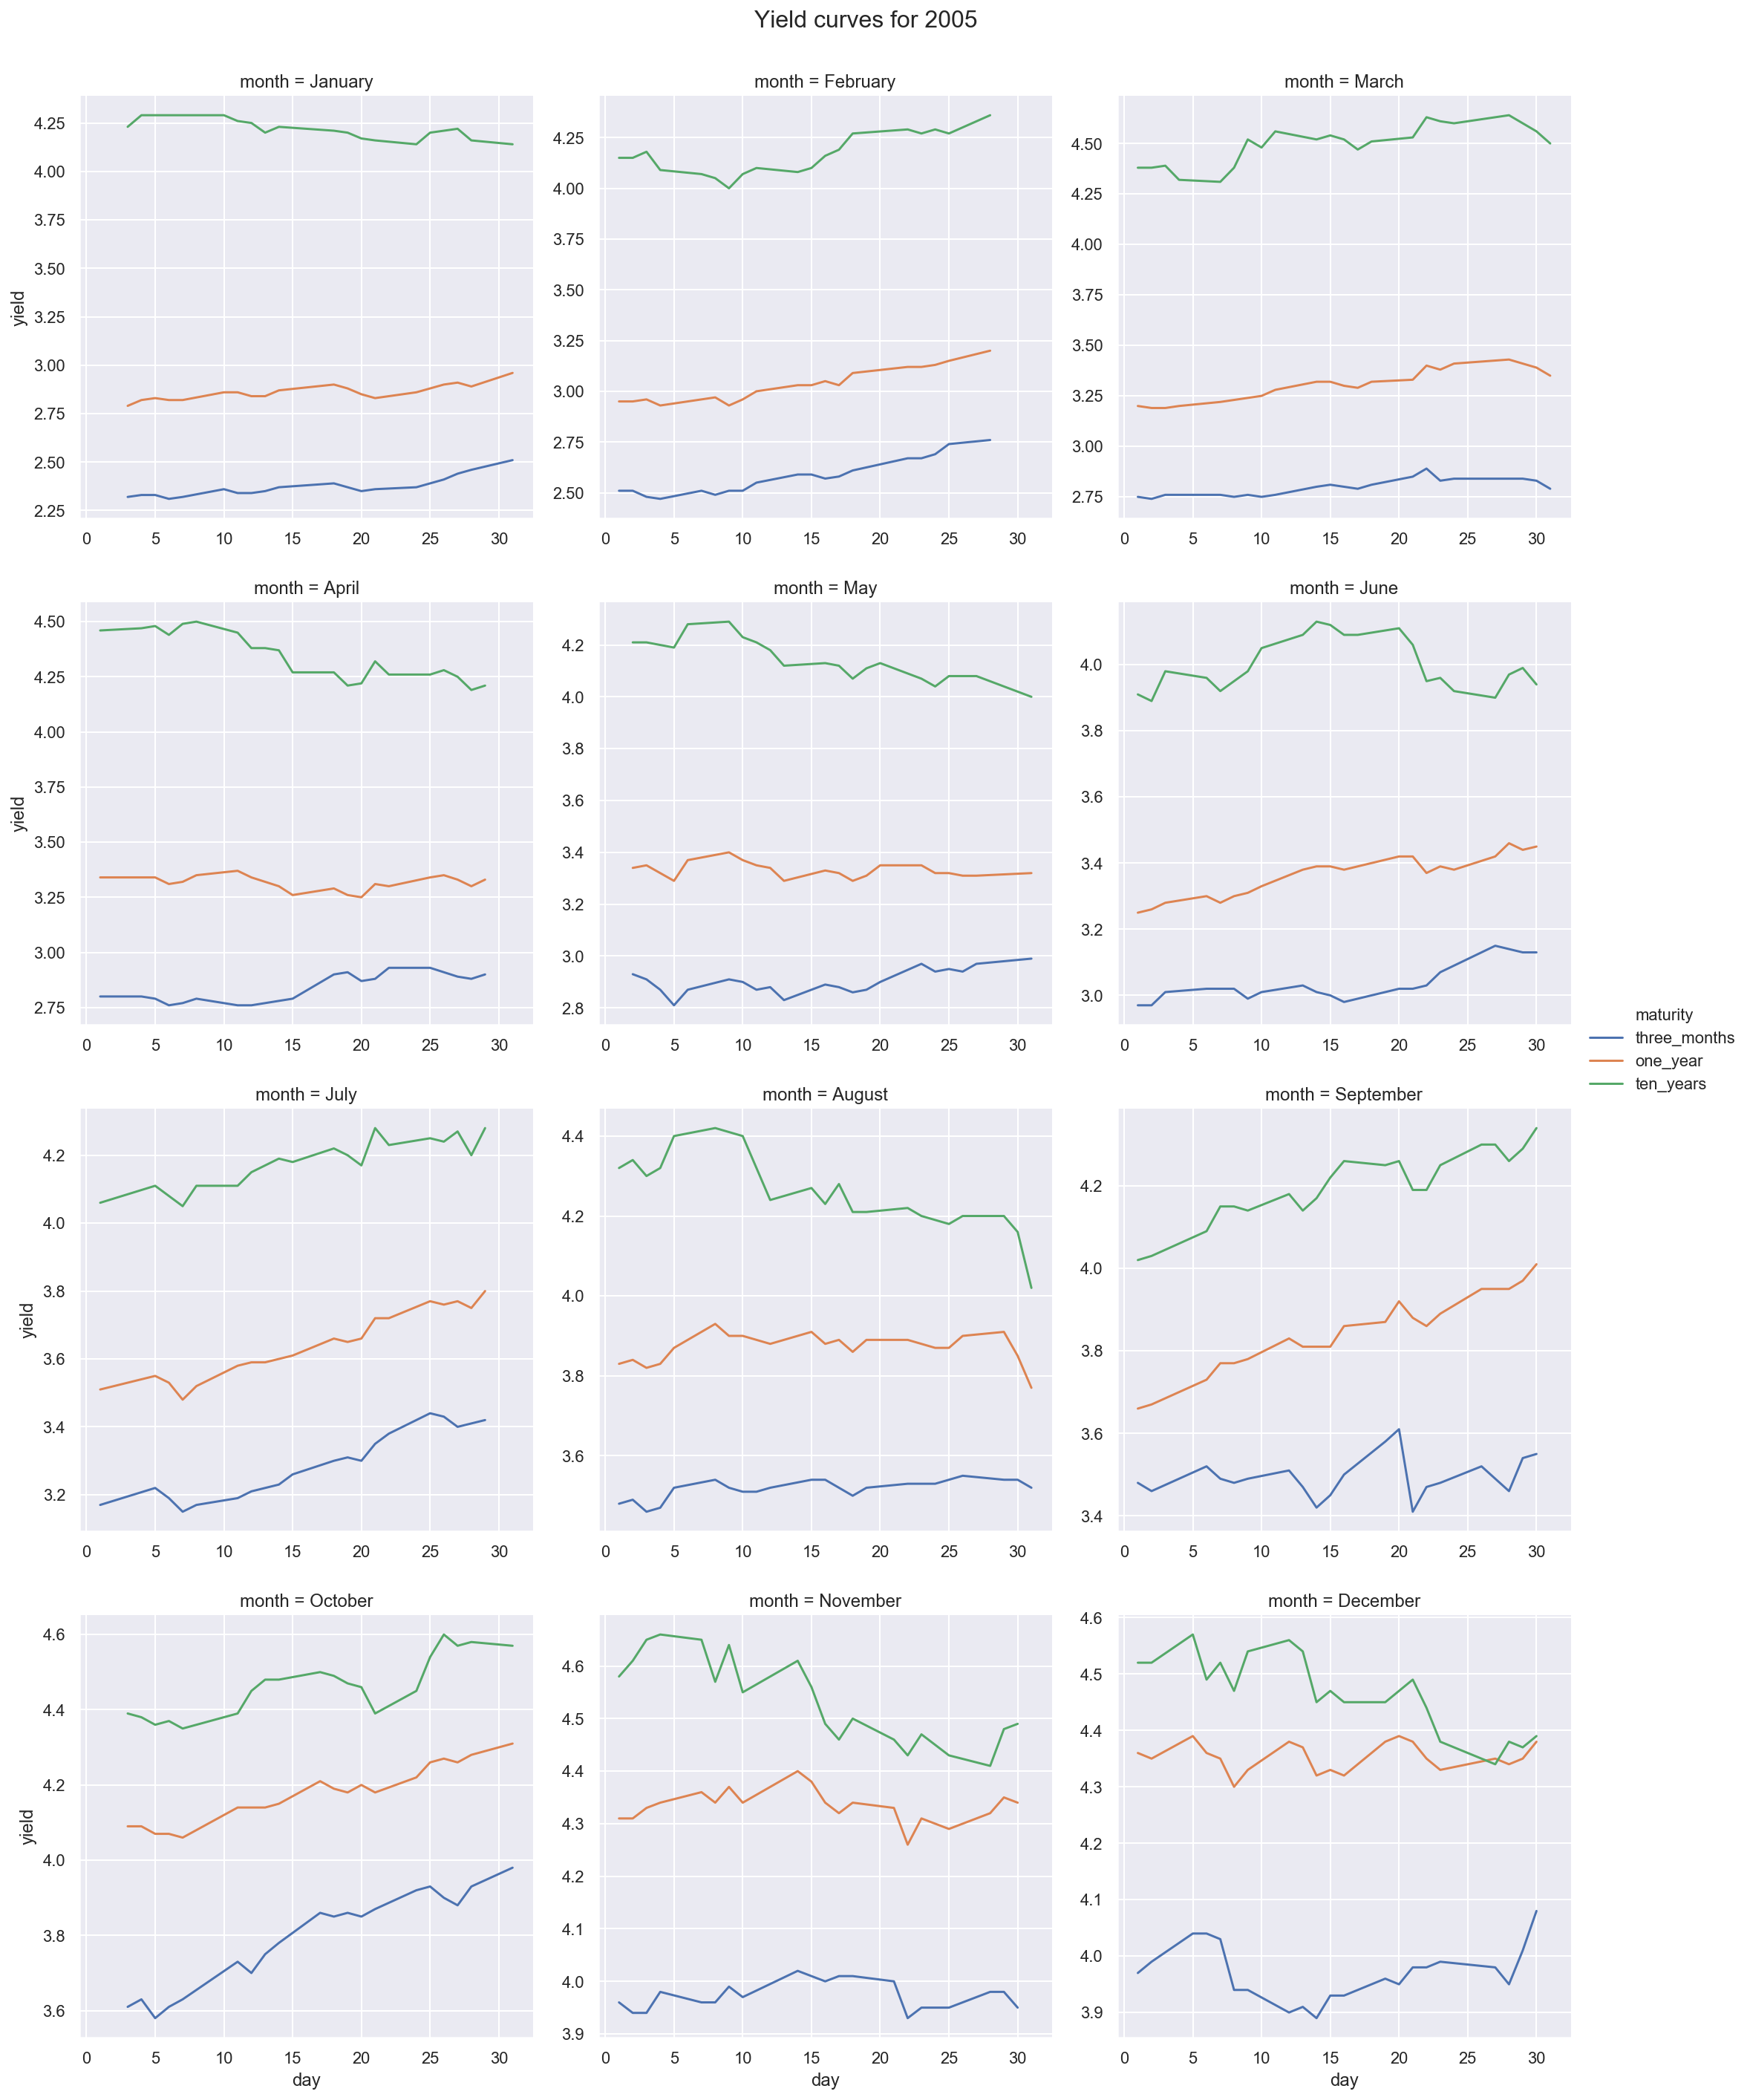

In [14]:
g = sns.relplot(x='day', y='yield', col='month', hue='maturity',
            facet_kws=dict(sharey=False, sharex=True), col_wrap=3,
            kind='line', data=bonds_2005_subset)

g.fig.suptitle('Yield curves for 2005', size=16)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
g.fig.subplots_adjust(top=.94, hspace=0.2);

As we can see, 2005 featured pretty [normal yield curves](https://www.investopedia.com/terms/n/normalyieldcurve.asp), with longer maturities having higher yields (as expected because of the [time value of money](https://www.investopedia.com/terms/t/timevalueofmoney.asp)). As the year progressed, the three of them started getting closer, anticipating the 2008 economic crisis.  
Let's plot the yield curves for 2006 to see how this continued. 

In [15]:
bonds_2006 = bonds.loc['2006']
bonds_2006['day'] = bonds_2006.index.day
bonds_2006['month'] = bonds_2006.index.month_name()
bonds_2006.head()

,one_month,three_months,one_year,two_years,three_years,five_years,ten_years,thirty_years,day,month
date,,,,,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,January
2006-01-03,4.05,4.16,4.38,4.34,4.30,4.30,4.37,NaN,3,January
2006-01-04,4.03,4.19,4.35,4.31,4.28,4.28,4.36,NaN,4,January
2006-01-05,4.05,4.20,4.36,4.32,4.29,4.29,4.36,NaN,5,January
2006-01-06,4.06,4.22,4.38,4.36,4.32,4.32,4.38,NaN,6,January


In [16]:
bonds_2006_tidy = bonds_2006.melt(id_vars=['day', 'month'], var_name='maturity', value_name='yield')

# We'll plot only 10y, 1y, 3m bond series
bonds_2006_subset = bonds_2006_tidy.loc[bonds_2006_tidy['maturity'].isin(['three_months', 'one_year', 'ten_years'])]

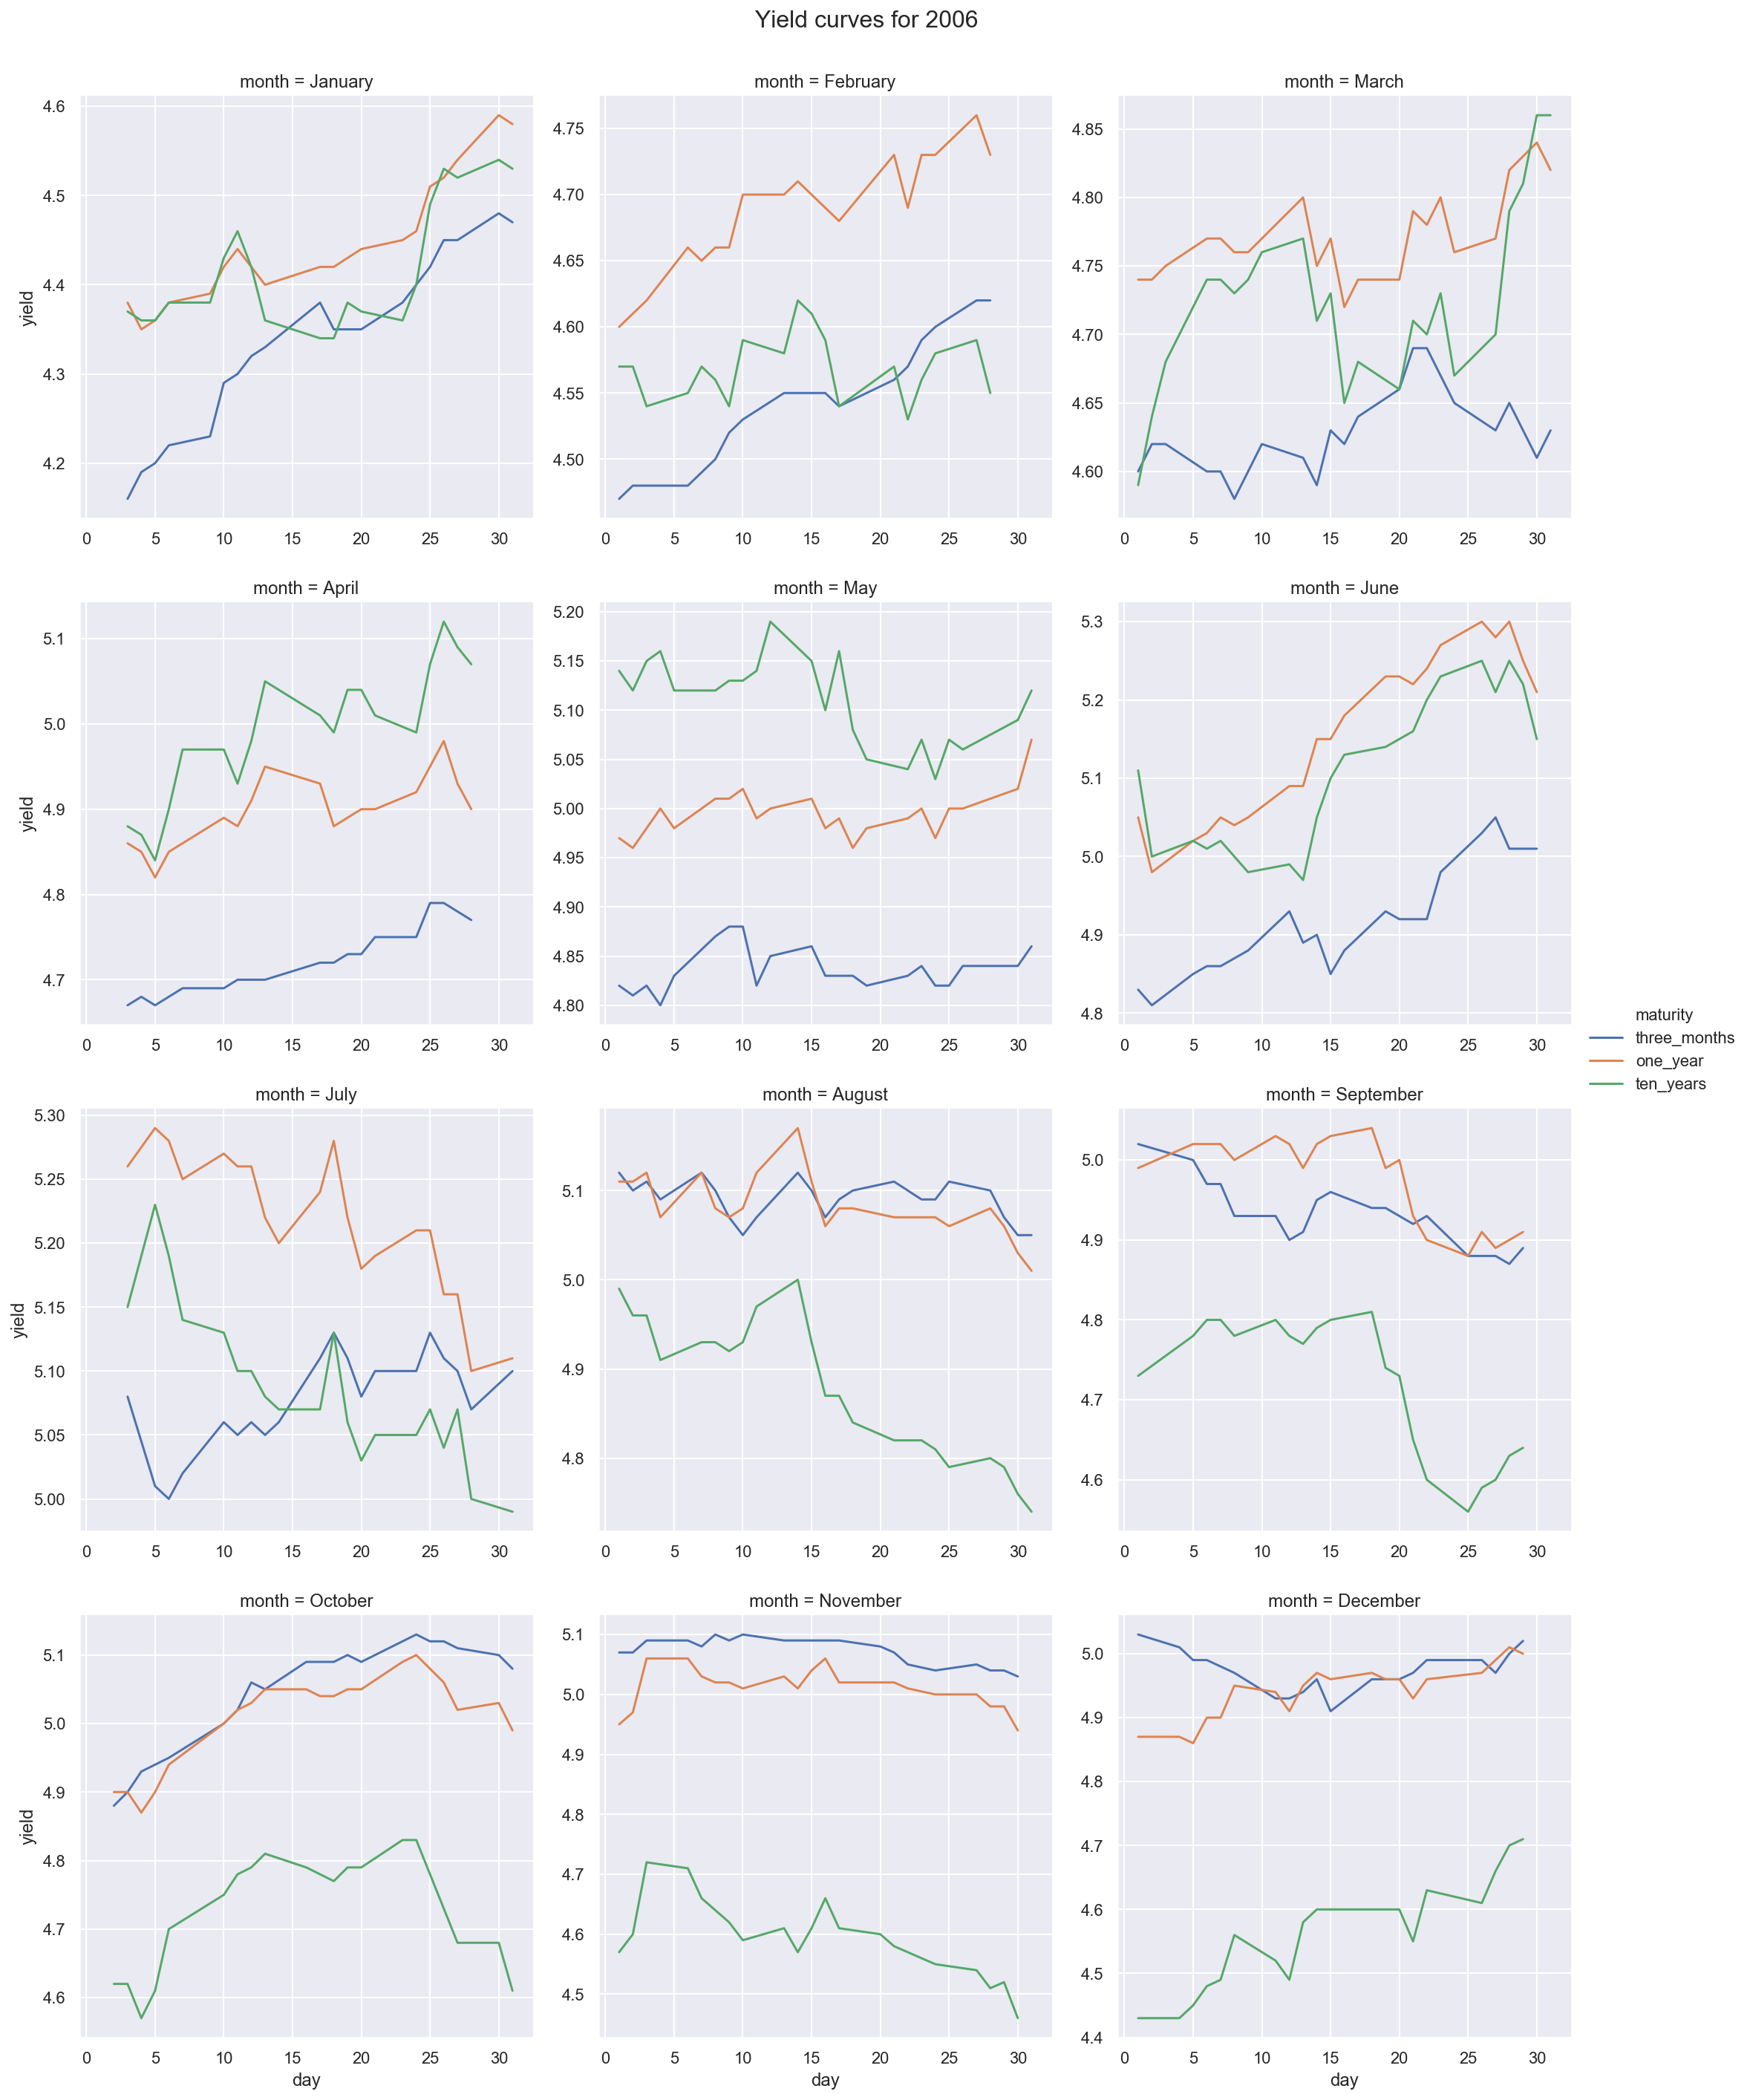

In [17]:
g = sns.relplot(x='day', y='yield', col='month', hue='maturity',
            facet_kws=dict(sharey=False, sharex=True), col_wrap=3,
            kind='line', data=bonds_2006_subset)

g.fig.suptitle('Yield curves for 2006', size=16)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
g.fig.subplots_adjust(top=.94, hspace=0.2);

Throughout 2006, yield curves continued to [invert](https://www.investopedia.com/terms/i/invertedyieldcurve.asp), with three month maturity bonds having the highest yield and ten year bonds the lowest by the end of the year. Let's now compare this to the 2019 curves.

In [18]:
bonds_2019 = bonds.loc['2019']
bonds_2019['day'] = bonds_2019.index.day
bonds_2019['month'] = bonds_2019.index.month_name()
bonds_2019.head()

,one_month,three_months,one_year,two_years,three_years,five_years,ten_years,thirty_years,day,month
date,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,January
2019-01-02,2.40,2.42,2.60,2.50,2.47,2.49,2.66,2.97,2,January
2019-01-03,2.42,2.41,2.50,2.39,2.35,2.37,2.56,2.92,3,January
2019-01-04,2.40,2.42,2.57,2.50,2.47,2.49,2.67,2.98,4,January
2019-01-07,2.42,2.45,2.58,2.53,2.51,2.53,2.70,2.99,7,January


In [19]:
bonds_2019_tidy = bonds_2019.melt(id_vars=['day', 'month'], var_name='maturity', value_name='yield')

In [20]:
bonds_2019_tidy.head()

,day,month,maturity,yield
0,1,January,one_month,NaN
1,2,January,one_month,2.40
2,3,January,one_month,2.42
3,4,January,one_month,2.40
4,7,January,one_month,2.42


In [21]:
# We'll plot only 10y, 1y, 3m bond series
bonds_2019_subset = bonds_2019_tidy.loc[bonds_2019_tidy['maturity'].isin(['three_months', 'one_year', 'ten_years'])]

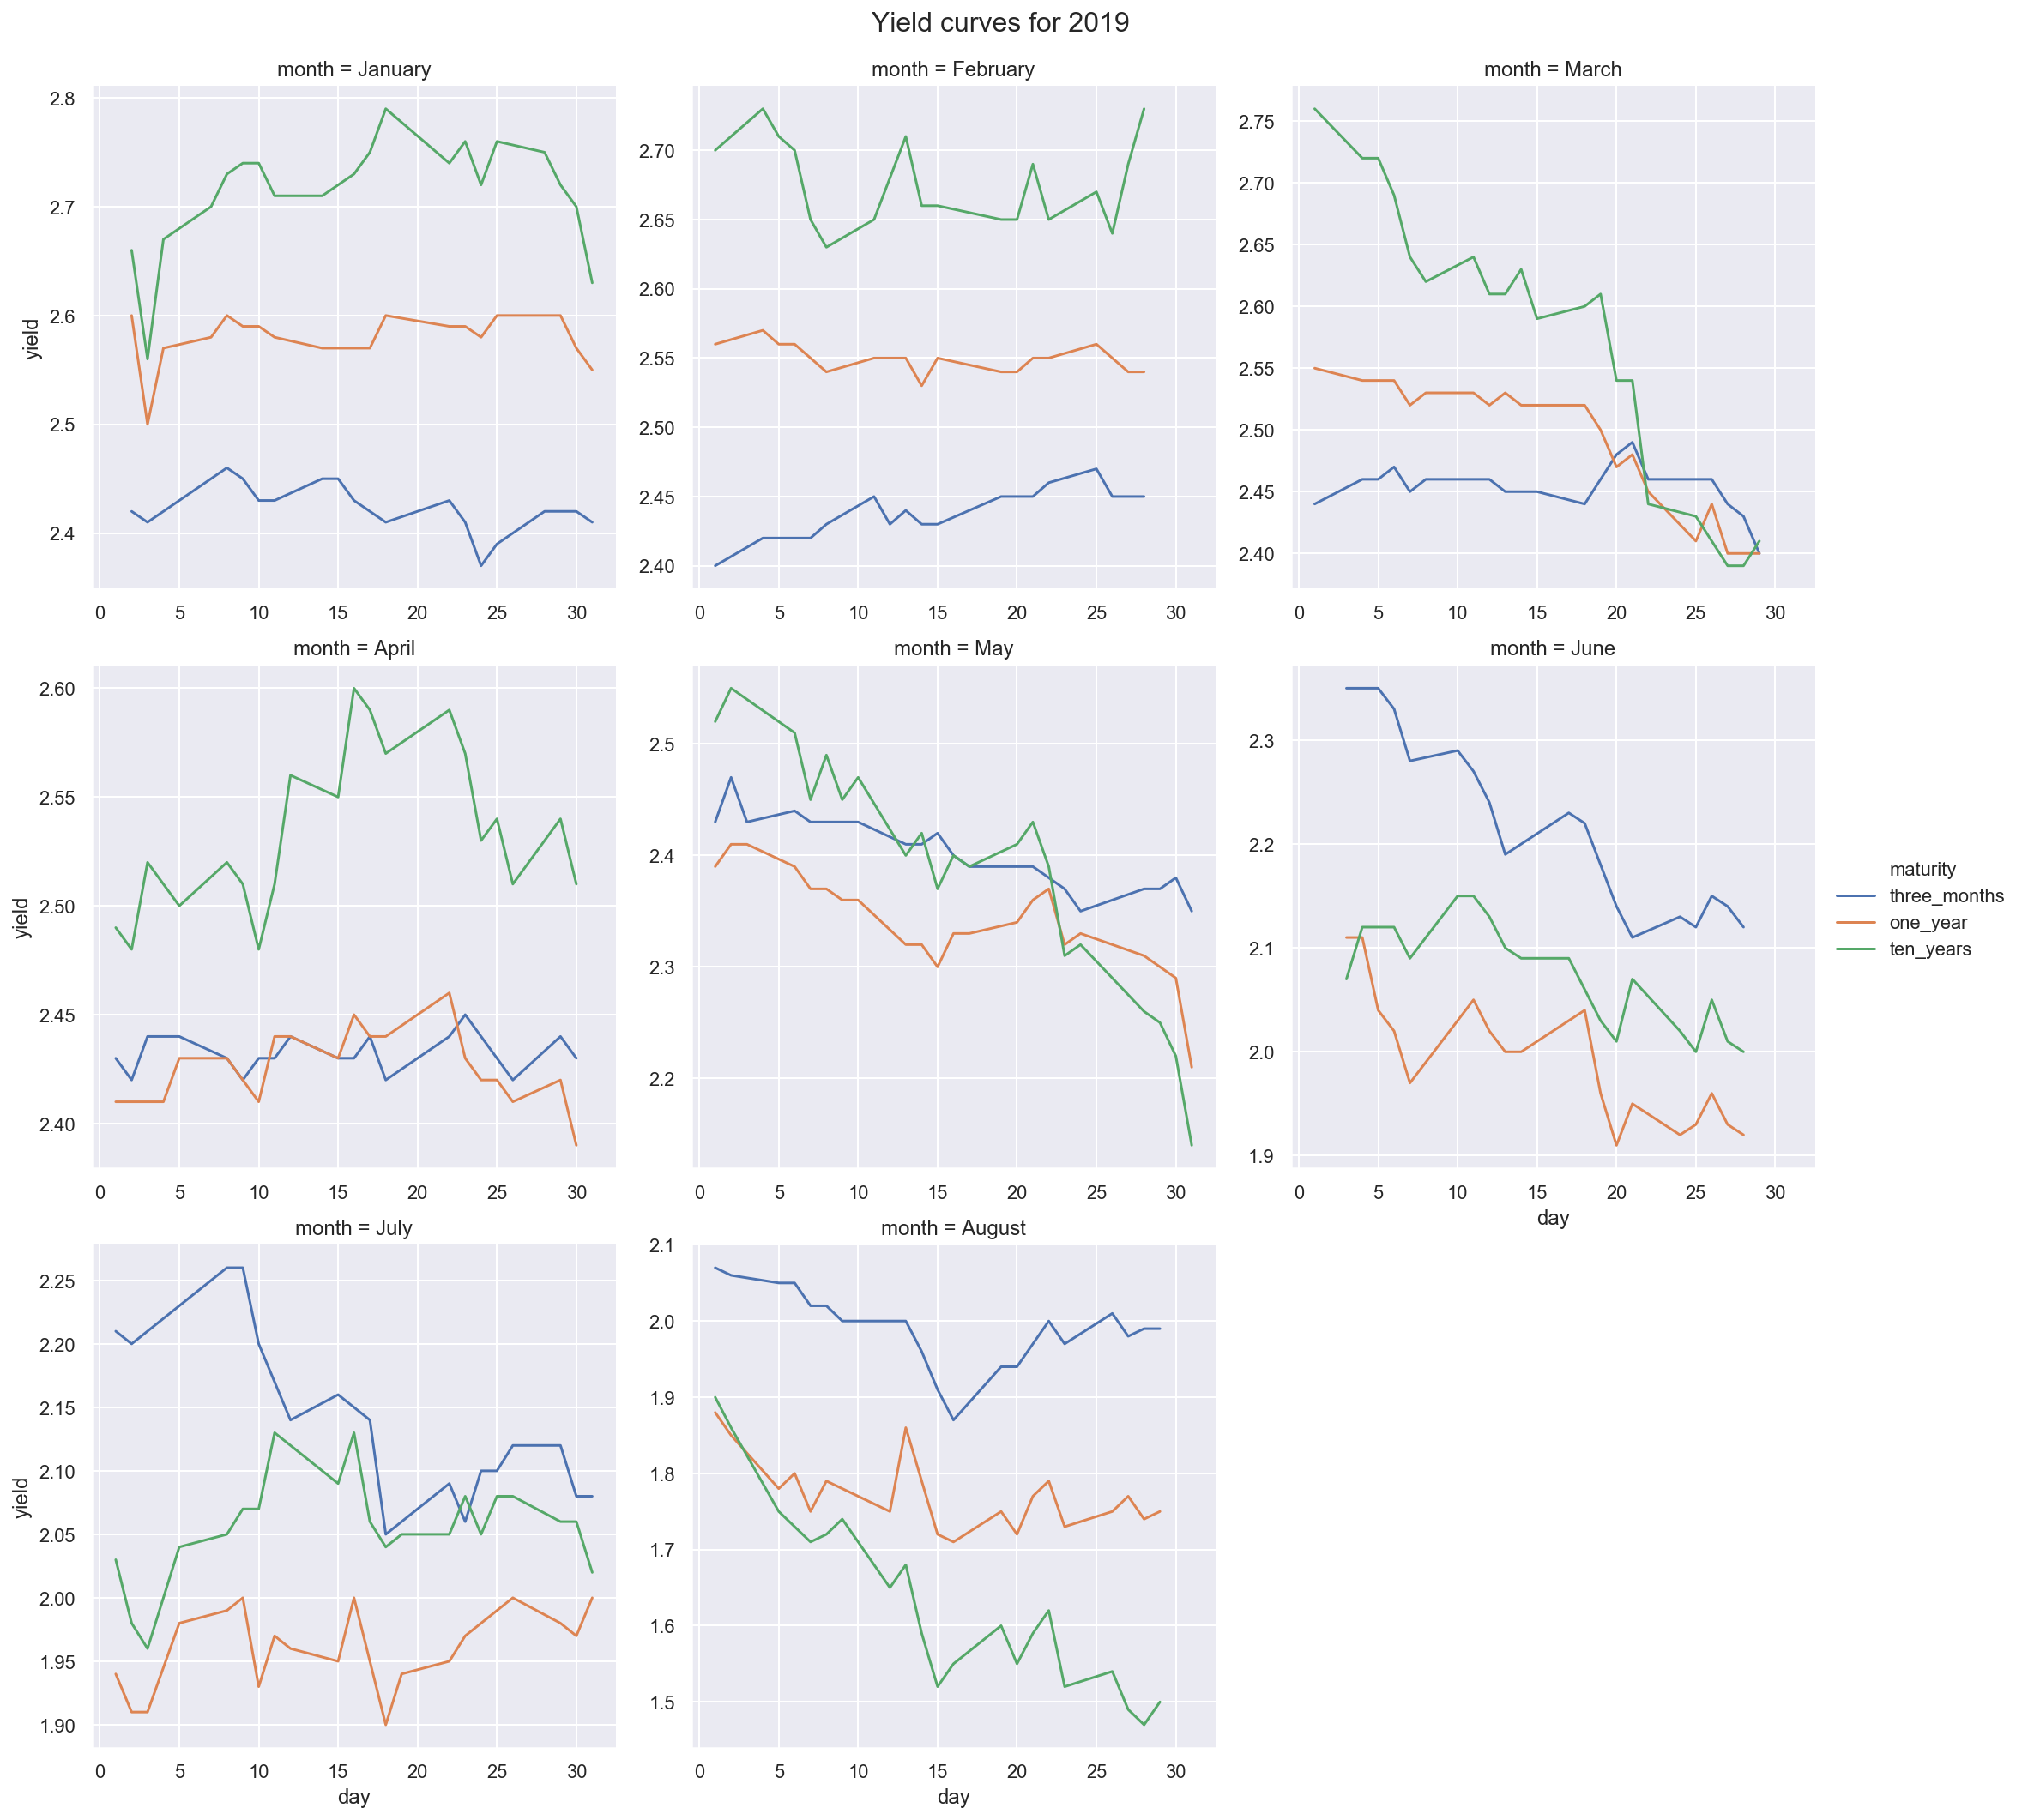

In [22]:
g = sns.relplot(x='day', y='yield', col='month', hue='maturity',
            facet_kws=dict(sharey=False, sharex=True), col_wrap=3,
            kind='line', data=bonds_2019_subset)

g.fig.suptitle('Yield curves for 2019', size=16)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
g.fig.subplots_adjust(top=.94);

In a similar fashion to 2006, yield curves are experiencing a turbulent year as they start inverting. There is [growing concern](https://www.washingtonpost.com/business/2019/08/14/recession-watch-what-is-an-inverted-yield-curve-why-does-it-matter/) that this might be a sign of incoming recession as it has been in the past.